In [2]:
!pip install interpret
!pip install scikit-learn
!pip install matplotlib
!pip install utils


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 48.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 31.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254

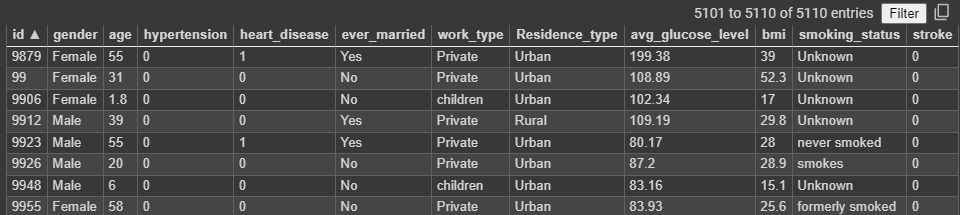

In [ ]:
!pip install scikit-learn interpret imbalanced-learn


###This class help us handle the dataset for loading
####loading data + process data (select the item for testing, select attribute for evaluating)
####spliting data for train/test/validating
###oversampling techniques for ỉmprove the quality of data set

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

###This class help us handle the dataset for loading
####loading data + process data (select the item for testing, select attribute for evaluating)
####spliting data for train/test/validating
###oversampling techniques for ỉmprove the quality of data set
class DataLoader:
    def __init__(self):
        self.data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.smote = SMOTE(random_state=2021)
        self.feature_names = []  # To store feature names after preprocessing

    def load_dataset(self, file_path='/content/healthcare-dataset-stroke-data.csv'):
        """
        Load the dataset from a CSV file or another source.
        """
        self.data = pd.read_csv(file_path)

    def preprocess_data(self):
        """
        Preprocess the dataset: handle missing values, convert categorical variables, etc.
        """
        # Handle missing values, if necessary
        self.data.dropna(inplace=True)

        # Convert categorical features to numerical
        self.data = pd.get_dummies(self.data, drop_first=True)

        # Separate features and target variable
        self.X = self.data.drop(["id", "stroke"], axis=1)  # Assuming 'stroke' is the target variable
        self.y = self.data["stroke"]

        # Save the feature names after one-hot encoding
        self.feature_names = self.X.columns.tolist()

        # Feature scaling
        self.X = self.scaler.fit_transform(self.X)

    def get_data_split(self, test_size=0.2, random_state=2021):
        """
        Split the dataset into training and testing sets.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )
        return self.X_train, self.X_test, self.y_train, self.y_test

    def oversample(self, X, y):
        """
        Apply SMOTE to handle class imbalance in the training data.
        """
        X_resampled, y_resampled = self.smote.fit_resample(X, y)
        return X_resampled, y_resampled

# Initialize and use DataLoader
data_loader = DataLoader()
data_loader.load_dataset('/content/healthcare-dataset-stroke-data.csv')
data_loader.preprocess_data()
X_train, X_test, y_train, y_test = data_loader.get_data_split()
X_train, y_train = data_loader.oversample(X_train, y_train)


#Trainning the model with LIME -> get the F1 score and accuracy

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


F1 Score 0.5494617963649198
Accuracy 0.9338085539714868


In [ ]:
!pip install lime


What is random_state?
Purpose: The random_state parameter controls the randomness of the algorithm's internal processes, such as data splitting, initialization of internal states, and selection of random subsets of data.

Type: It can be an integer, which is used as a seed for the random number generator, or it can be set to None (or omitted) for non-deterministic behavior.

Explanation:
LimeTabular Class:

This class is part of the interpret library and is used to create LIME explanations for tabular data. LIME provides a way to interpret the predictions of complex machine learning models by approximating them with simpler, locally interpretable models.
Parameters in LimeTabular:

**model=rf:**

This specifies the machine learning model for which you want to generate explanations. In this case, rf is a RandomForestClassifier that you’ve trained on your data. The LIME algorithm will use this model to understand and explain its predictions.
**data=X_train:**

This is the training data that the LIME algorithm uses to generate explanations. LIME uses this data to understand the distribution and characteristics of the features. This helps in creating locally interpretable models for individual predictions.
**feature_names=data_loader.feature_names:**

This parameter provides the names of the features used in your dataset. It’s important to specify feature names so that the explanations are interpretable and you can understand which features are influencing the model’s predictions. The feature names are obtained from the DataLoader instance.
**random_state=1:**

This ensures that the randomness in LIME's explanation process is reproducible. Setting a fixed random_state ensures that the results are consistent across different runs, making the explanations reliable and reproducible.

In [30]:
from interpret.blackbox import LimeTabular
from interpret import show
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Initialize the RandomForest model
rf = RandomForestClassifier(random_state=2021)
rf.fit(X_train, y_train)

# Create LIME explanation object with the required model argument
lime = LimeTabular(
    model=rf,  # The RandomForest model is passed here
    data=X_train,  # Training data
    feature_names=data_loader.feature_names,  # Feature names from your DataLoader
    random_state=1
)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate F1 Score and Accuracy
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Export the results to a CSV file
results = pd.DataFrame({
    'Metric': ['F1 Score', 'Accuracy'],
    'Value': [f1, accuracy]
})

# Get local explanations for the last 20 samples of X_test
lime_local = lime.explain_local(
    X_test[-20:],  # Test samples
    y_test[-20:],  # Corresponding test labels
    name='LIME'
)

# Display the explanations
show(lime_local)



F1 Score: 0.5555890782923517
Accuracy: 0.9389002036659878


. Using Feature Importance in Random Forest:
Random Forest provides feature importance scores directly. These scores indicate how important each feature is for the predictions.

                           Feature  Importance
0                              age    0.328835
3                avg_glucose_level    0.154104
4                              bmi    0.123133
7                 ever_married_Yes    0.081253
12            Residence_type_Urban    0.057098
5                      gender_Male    0.047739
14     smoking_status_never smoked    0.038105
1                     hypertension    0.037833
9                work_type_Private    0.037806
10         work_type_Self-employed    0.022785
15           smoking_status_smokes    0.018664
13  smoking_status_formerly smoked    0.018262
11              work_type_children    0.017760
2                    heart_disease    0.016618
8           work_type_Never_worked    0.000005
6                     gender_Other    0.000000


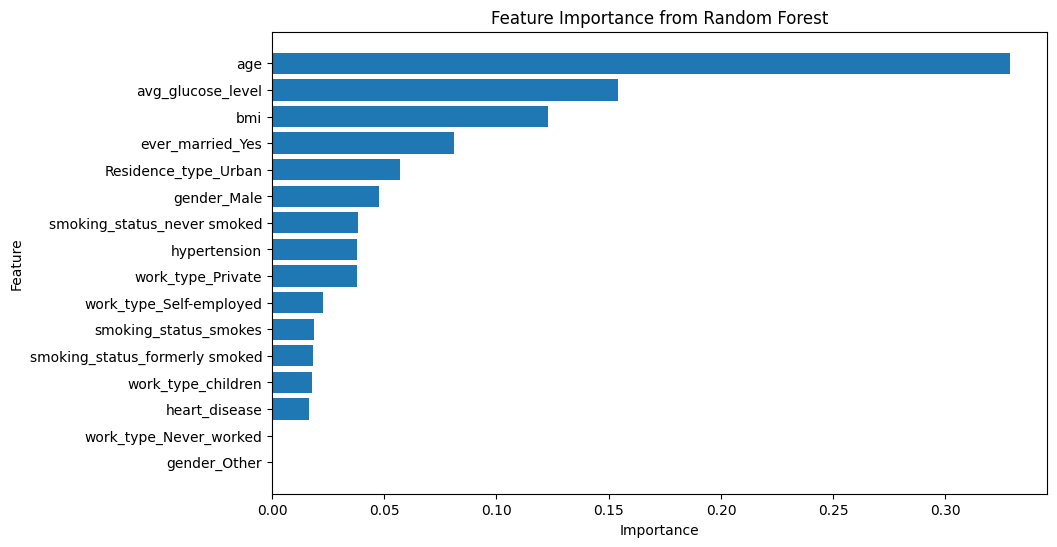

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Fit RandomForest model
rf = RandomForestClassifier(random_state=2021)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': data_loader.feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Assuming 'names' and 'scores' are the correct keys based on inspection
try:
    feature_importance_ebm = pd.DataFrame({
        'Feature': global_importance['names'],
        'Importance': global_importance['scores']  # or adjust based on inspection
    })

    # Sort the DataFrame by importance scores
    feature_importance_ebm = feature_importance_ebm.sort_values(by='Importance', ascending=False)

    print(feature_importance_ebm)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_ebm['Feature'], feature_importance_ebm['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance from EBM')
    plt.gca().invert_yaxis()
    plt.show()

except KeyError as e:
    print(f"KeyError: {e}. Check the keys of global_importance: {global_importance.keys()}")
